<a href="https://colab.research.google.com/github/haeniKim/metaverse-academy/blob/master/DL/230914_%EC%A3%BC%EC%8B%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prophet 기초
이론
##세 개의 주요 요소를 활용해 예측: Trend, Seasonality, Holiday
the trend function. models non-periodic changes in the value of the time series.
주기적이지 않은 변화를 반영 (트렌드를 반영)

represents periodic changes (ex. weekly / yearly seasonality)
주기적인 변화를 반영 (주, 일, 연 등의 기간에 따라 주기적으로 나타나는 흐름)

represents the effects of holidays
불규칙한 event인 휴일의 영향을 반영

the error term. represents any unusual changes not accommodated by the model
(정규분포를 따른다고 가정)
오차항. 모델에서 수용할 수 없는 비정상적인 변경을 나타냅니다.

In [ ]:
!pip install prophet

In [ ]:
!pip install statsmodels==0.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 23.9 MB/s eta 0:00:00
  Installing build dependencies ... canceledERROR: Operation cancelled by user


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
from pandas_datareader import data
import pandas as pd

In [ ]:
yf.pdr_override()

sam_data = data.get_data_yahoo('002700.KS','2020-1-1','2023-9-13')
sam_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1860.0,1865.0,1835.0,1855.0,1803.136963,745063
2020-01-03,1850.0,1860.0,1815.0,1835.0,1783.696167,1329726
2020-01-06,1805.0,1820.0,1750.0,1815.0,1764.255249,2314928
2020-01-07,1825.0,1835.0,1800.0,1810.0,1759.395020,872997
2020-01-08,1790.0,1805.0,1705.0,1745.0,1696.212402,3057079
...,...,...,...,...,...,...
2023-09-06,1744.0,1747.0,1733.0,1746.0,1746.000000,259759
2023-09-07,1746.0,1746.0,1733.0,1736.0,1736.000000,373603
2023-09-08,1733.0,1799.0,1733.0,1773.0,1773.000000,531306


In [ ]:
df = pd.DataFrame({'ds':sam_data.index , 'y':sam_data['Close']})
df.reset_index(inplace=True)
del df['Date']
df

,ds,y
0,2020-01-02,1855.0
1,2020-01-03,1835.0
2,2020-01-06,1815.0
3,2020-01-07,1810.0
4,2020-01-08,1745.0
...,...,...
909,2023-09-06,1746.0
910,2023-09-07,1736.0
911,2023-09-08,1773.0
912,2023-09-11,1774.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

%matplotlib inline

In [ ]:
df

,ds,y
0,2020-01-02,1855.0
1,2020-01-03,1835.0
2,2020-01-06,1815.0
3,2020-01-07,1810.0
4,2020-01-08,1745.0
...,...,...
909,2023-09-06,1746.0
910,2023-09-07,1736.0
911,2023-09-08,1773.0
912,2023-09-11,1774.0


In [ ]:
sam_predict = Prophet(yearly_seasonality=True, daily_seasonality=True)
sam_predict.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp684w7a7d/8onxzhi5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp684w7a7d/wxths5lr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66841', 'data', 'file=/tmp/tmp684w7a7d/8onxzhi5.json', 'init=/tmp/tmp684w7a7d/wxths5lr.json', 'output', 'file=/tmp/tmp684w7a7d/prophet_modelg6zz_ynz/prophet_model-20230914013145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:31:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:31:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
result = sam_predict.make_future_dataframe(periods=365)
forecast = sam_predict.predict(result)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1274,2024-09-07,1422.891021,1242.236478,1588.891056
1275,2024-09-08,1420.986522,1253.671776,1583.385651
1276,2024-09-09,1405.390324,1225.444955,1569.635007
1277,2024-09-10,1402.888413,1206.129823,1577.644929
1278,2024-09-11,1400.429447,1223.599085,1579.451876


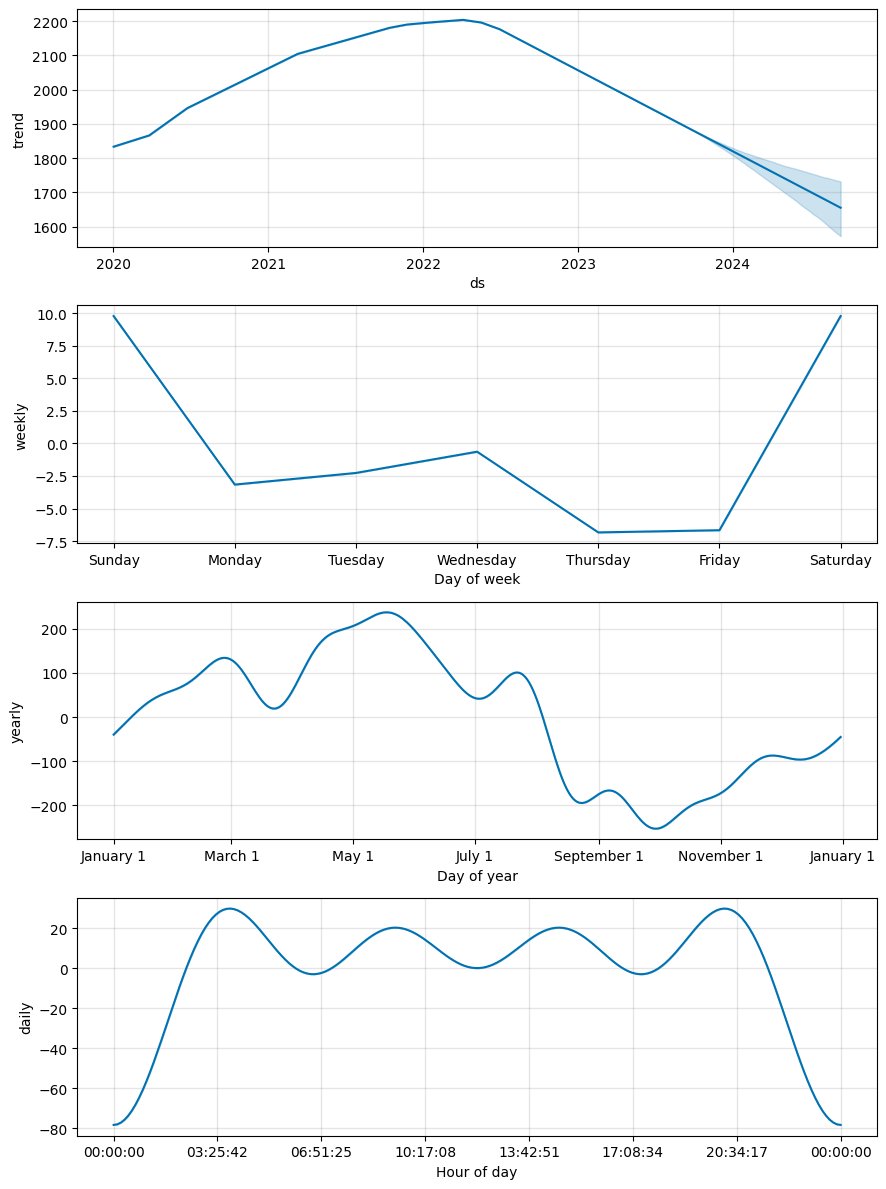

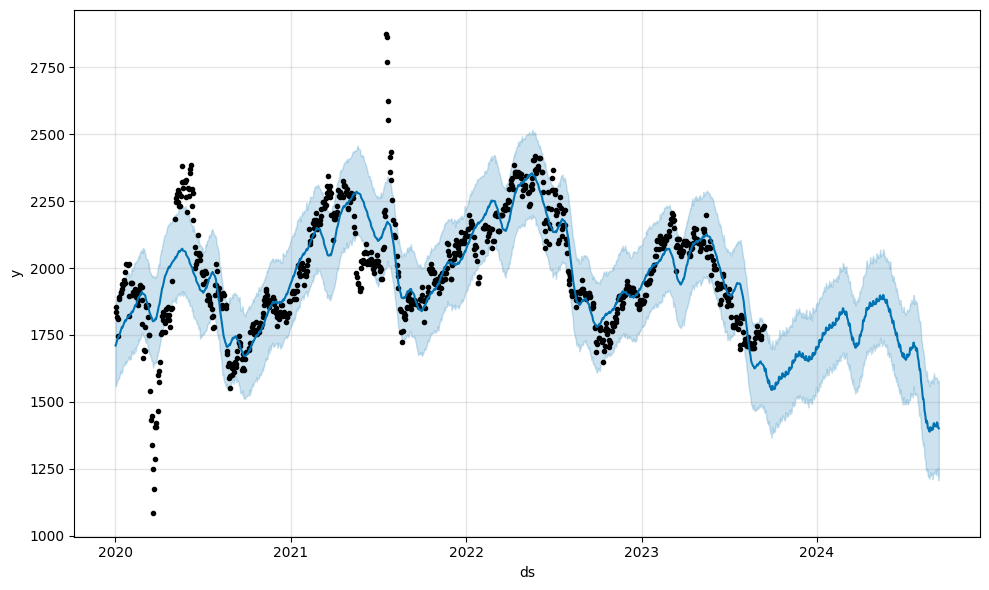

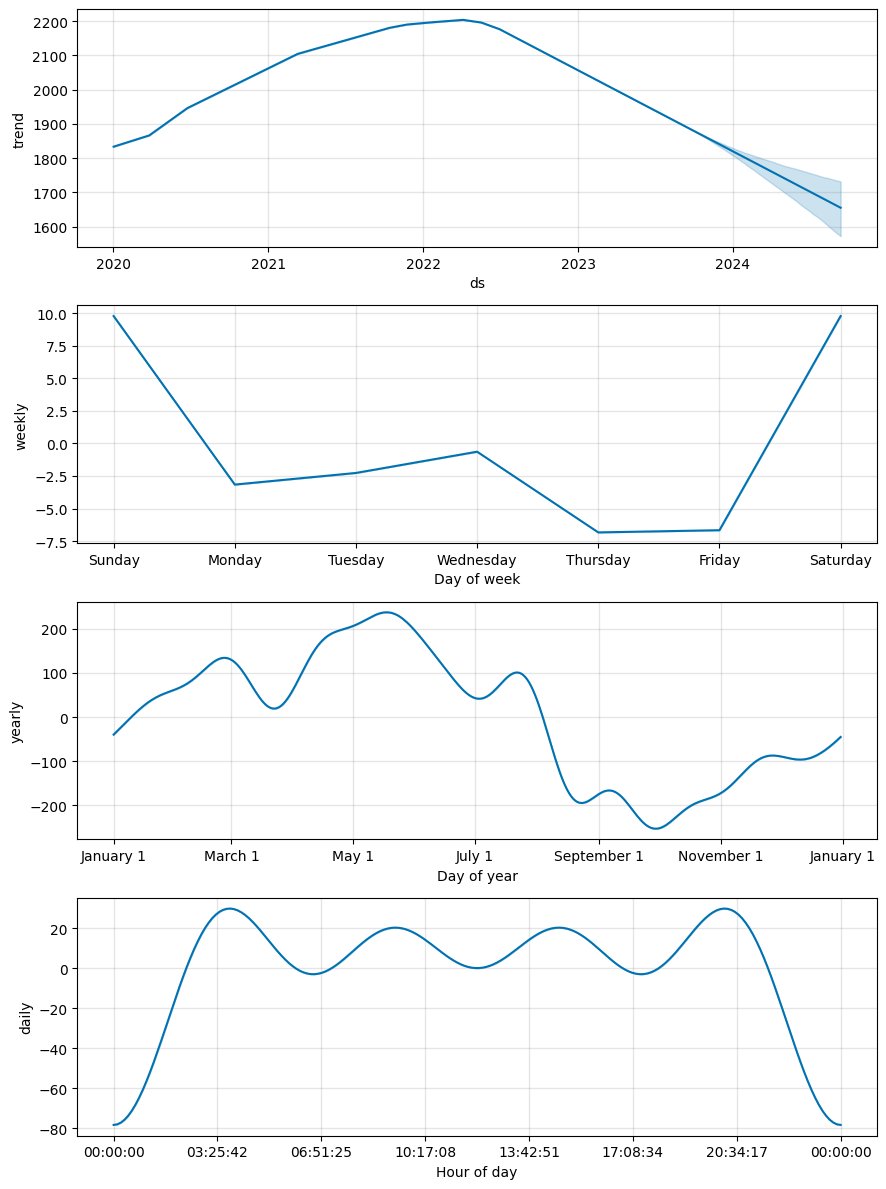

In [ ]:
sam_predict.plot(forecast)
sam_predict.plot_components(forecast)